# Question number :1


In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


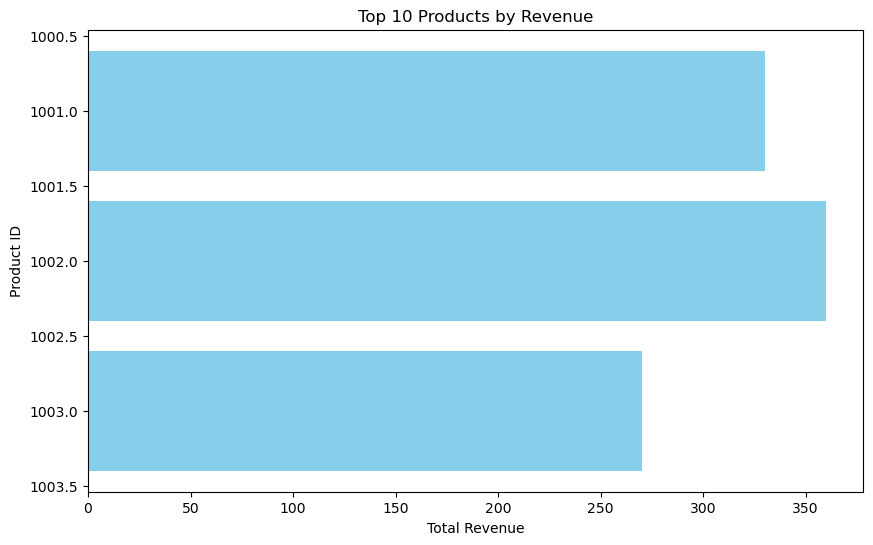

In [6]:
# Read the dataset
data = pd.read_csv(r'C:\Users\PAVAN D\Downloads\sales_data.csv')

# Group the data by 'product_id' and calculate the total revenue for each product
product_revenue = data.groupby('product_id')['revenue'].sum().reset_index()

# Sort the products by revenue in descending order
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head(10)

# Create a bar plot to visualize the top 10 products by revenue
plt.figure(figsize=(10, 6))
plt.barh(top_10_products['product_id'], top_10_products['revenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Revenue')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest revenue product at the top
plt.show()

# question number :2

In [ ]:
SELECT empno
FROM salaries
WHERE salary = (SELECT MAX(salary) FROM salaries);

# Question number : 3

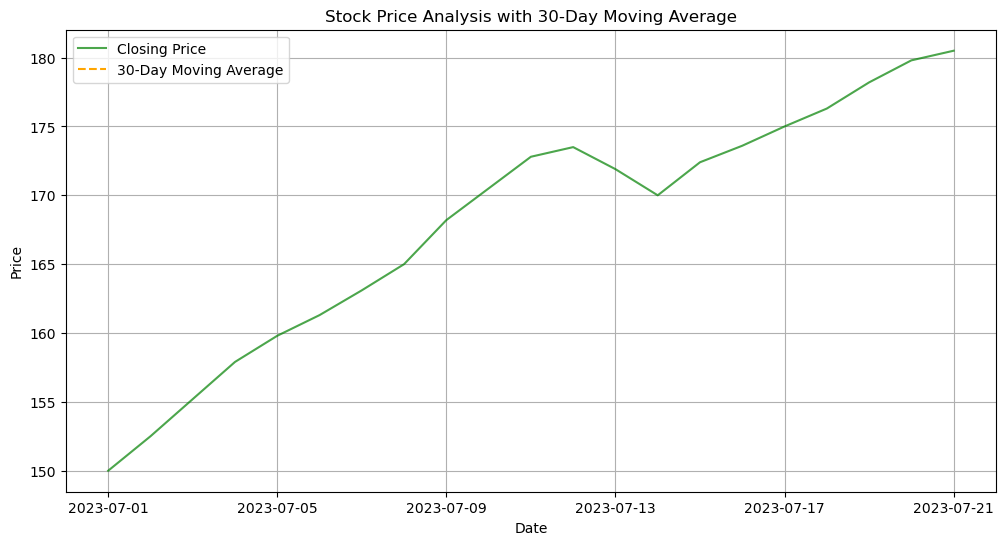

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the dataset
data = pd.read_csv(r'C:\Users\PAVAN D\Downloads\stock_prices.csv')

# Convert the 'date' column to a datetime object
data['date'] = pd.to_datetime(data['date'])

# Sort the data by date (if it's not already sorted)
data.sort_values(by='date', inplace=True)


data['30_day_ma'] = data['closing_price'].rolling(window=30).mean()

# Create a plot to visualize the closing price and the rolling 30-day moving average
plt.figure(figsize=(12, 6))
plt.plot(data['date'], data['closing_price'], label='Closing Price', color='green', alpha=0.7)
plt.plot(data['date'], data['30_day_ma'], label='30-Day Moving Average', color='orange', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Analysis with 30-Day Moving Average')
plt.legend()
plt.grid(True)
plt.show()


# questionnumber 4:

SELECT
    activity_date,
    ROUND(
        (COUNT(DISTINCT CASE WHEN activity_type IS NOT NULL THEN user_id END) * 100.0)
        / COUNT(DISTINCT user_id),
        2)
    AS engagement_rate
FROM user_activity
GROUP BY activity_date
ORDER BY activity_date;



# Question number :5

In [9]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\PAVAN D\Downloads\customer_data.csv')

# Data Cleaning: Removing duplicates and handling missing values
data.drop_duplicates(inplace=True)  # Remove duplicate rows
data.dropna(subset=['gender', 'purchases'], inplace=True)  # Remove rows with missing values in 'gender' or 'purchases'

# Calculate the average number of purchases for each gender
average_purchases_by_gender = data.groupby('gender')['purchases'].mean().reset_index()

# Print the result
print(average_purchases_by_gender)


  gender  purchases
0      F       7.00
1      M      11.25


# Question number :6

In [ ]:
WITH LatestDate AS (
    SELECT
        product_id,
        warehouse_id,
        MAX(date) AS latest_date
    FROM
        inventory
    GROUP BY
        product_id,
        warehouse_id
)

SELECT
    i.product_id,
    i.warehouse_id,
    i.date,
    i.quantity
FROM
    inventory i
INNER JOIN
    LatestDate ld
ON
    i.product_id = ld.product_id
    AND i.warehouse_id = ld.warehouse_id
    AND i.date = ld.latest_date;


# question number :7

In [23]:
import pandas as pd

# Read the dataset
data = pd.read_csv(r'C:\Users\PAVAN D\Downloads\mobile_events_2020.csv',sep=';')
print(data.head())

                           anonymous_id business_zoned context_app_version  \
0  9DDC5BCD-0477-4E83-A32A-51013DA0A4E7        Hamburg              3.1.13   
1  5592E78E-CE87-4258-B8D7-DD834A687A1E        Hamburg              3.1.13   
2  5592E78E-CE87-4258-B8D7-DD834A687A1E        Hamburg              3.1.13   
3  5592E78E-CE87-4258-B8D7-DD834A687A1E        Hamburg              3.1.13   
4  5592E78E-CE87-4258-B8D7-DD834A687A1E        Hamburg              3.1.13   

                      context_device_id context_os_name  \
0  7A718FF6-584F-40E2-939D-224231295B1E             iOS   
1  11D0CB16-DA38-4565-9C3B-066E7877856C             iOS   
2  11D0CB16-DA38-4565-9C3B-066E7877856C             iOS   
3  11D0CB16-DA38-4565-9C3B-066E7877856C             iOS   
4  11D0CB16-DA38-4565-9C3B-066E7877856C             iOS   

                        event_name          received_at           created_at  
0  Out-Of-Business Zone View Shown  2020-09-01 23:59:44  2020-09-01 23:59:18  
1               Ap

In [24]:
df = pd.DataFrame(data, columns=[
    'anonymous_id', 'business_zoned', 'context_app_version', 'context_device_id', 'context_os_name',
    'event_name', 'received_at', 'created_at'
])

# Define events indicating an intention to book
events = ['Scooter Selected - User', 'Vehicle Selected - User']

# Count sessions with an intention to book
sessions_with_intention = df[df['event_name'].isin(events)]['anonymous_id'].nunique()

# Total number of sessions
total_sessions = df['anonymous_id'].nunique()

# Calculate the percentage
percentage_intention = (sessions_with_intention / total_sessions) * 100

print(f"Percentage of sessions with an intention to book: {percentage_intention:.2f}%")



Percentage of sessions with an intention to book: 32.529841233051336%


In [25]:
# Define events indicating a successful booking
success_events = ['Ride Started - Successful', 'Ride Done - Successful']

# Count sessions with a successful booking
sessions_with_success = df[df['event_name'].isin(success_events)]['anonymous_id'].nunique()

# Calculate the percentage
percentage_success = (sessions_with_success / total_sessions) * 100

print(f"Percentage of sessions with a successful booking: {percentage_success:.2f}%")


Percentage of sessions with a successful booking: 43.38%


In [ ]:
3;>intention to book can be determined by specific user actions or behaviors that indicate a user's 
interest or readiness to make a booking.
In the context of a mobile app or website offering booking services